<a href="https://colab.research.google.com/github/kavita07lamani/Stock-Price-Prediction/blob/main/stock_price_forecasting_with_30_days_future_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Download Dataset

In [73]:
data = pd.read_csv('/content/META.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
1,2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2,2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
3,2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
4,2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800


In [74]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1232,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700
1233,2023-11-24,340.130005,341.859985,336.769989,338.230011,338.230011,5467500
1234,2023-11-27,336.179993,339.899994,334.200012,334.700012,334.700012,15684500
1235,2023-11-28,333.399994,339.380005,333.399994,338.989990,338.989990,12637200
1236,2023-11-29,339.690002,339.899994,330.779999,332.200012,332.200012,16024500


In [75]:
#checking number of rows and colomuns
data.shape

(1237, 7)

In [76]:
# Assuming the 'Close' column contains the closing stock prices
data = data[['Date', 'Close']]

In [77]:
# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

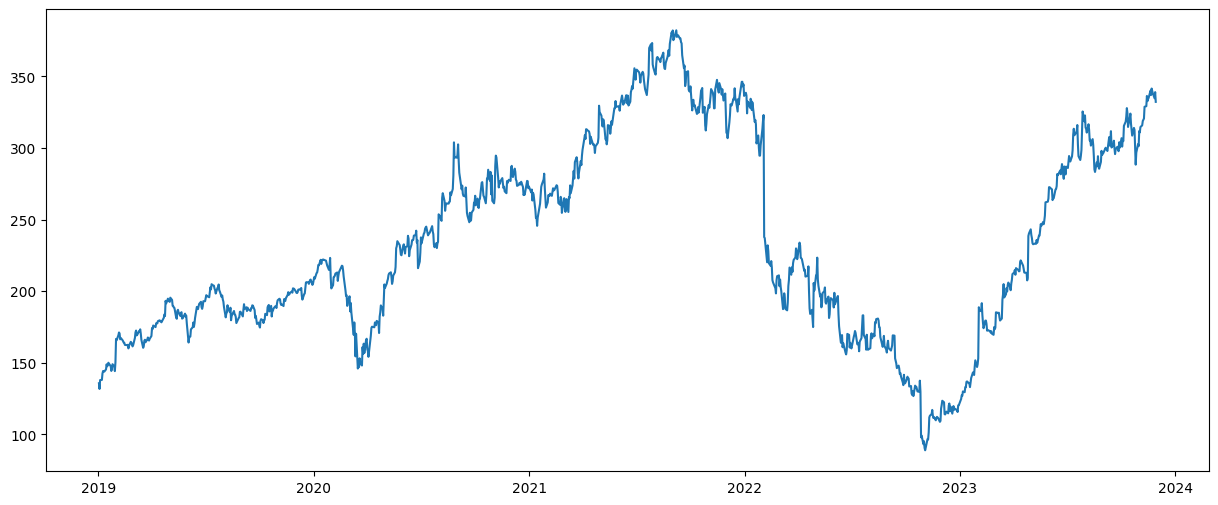

In [78]:
#visualization data set
plt.figure(figsize=(15, 6))
plt.plot(data)

 Normalize the data

In [79]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))


 Create sequences for training

In [80]:

sequence_length = 100
sequences = []
targets = []

for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length, 0])
    targets.append(scaled_data[i+sequence_length, 0])

In [81]:
# Convert sequences and targets to NumPy arrays
sequences = np.array(sequences)
targets = np.array(targets)

In [82]:
# Reshape sequences for LSTM input (samples, time steps, features)
sequences = np.reshape(sequences, (sequences.shape[0], sequences.shape[1], 1))

Build LSTM model

In [83]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequences.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [84]:
#Train the model
model.fit(sequences, targets, epochs=100, batch_size=64)

Epoch 1/100
18/18 [==============================] - 7s 120ms/step - loss: 0.0486
Epoch 2/100
18/18 [==============================] - 2s 108ms/step - loss: 0.0064
Epoch 3/100
18/18 [==============================] - 2s 107ms/step - loss: 0.0032
Epoch 4/100
18/18 [==============================] - 2s 108ms/step - loss: 0.0022
Epoch 5/100
18/18 [==============================] - 2s 108ms/step - loss: 0.0021
Epoch 6/100
18/18 [==============================] - 3s 158ms/step - loss: 0.0021
Epoch 7/100
18/18 [==============================] - 3s 141ms/step - loss: 0.0020
Epoch 8/100
18/18 [==============================] - 2s 107ms/step - loss: 0.0020
Epoch 9/100
18/18 [==============================] - 2s 107ms/step - loss: 0.0019
Epoch 10/100
18/18 [==============================] - 2s 110ms/step - loss: 0.0018
Epoch 11/100
18/18 [==============================] - 2s 107ms/step - loss: 0.0017
Epoch 12/100
18/18 [==============================] - 2s 134ms/step - loss: 0.0016
Epoch 13/100


Predict future values

In [85]:
future_values = []

last_sequence = scaled_data[-sequence_length:]
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))

for i in range(30):  # Predicting 30 days into the future
    predicted_value = model.predict(last_sequence)
    future_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = predicted_value[0, 0]

1/1 [==============================] - 0s 32ms/step


In [86]:
# Inverse transform the predicted values to get the actual stock prices
predicted_prices = scaler.inverse_transform(np.array(future_values).reshape(-1, 1))

Plotting the results

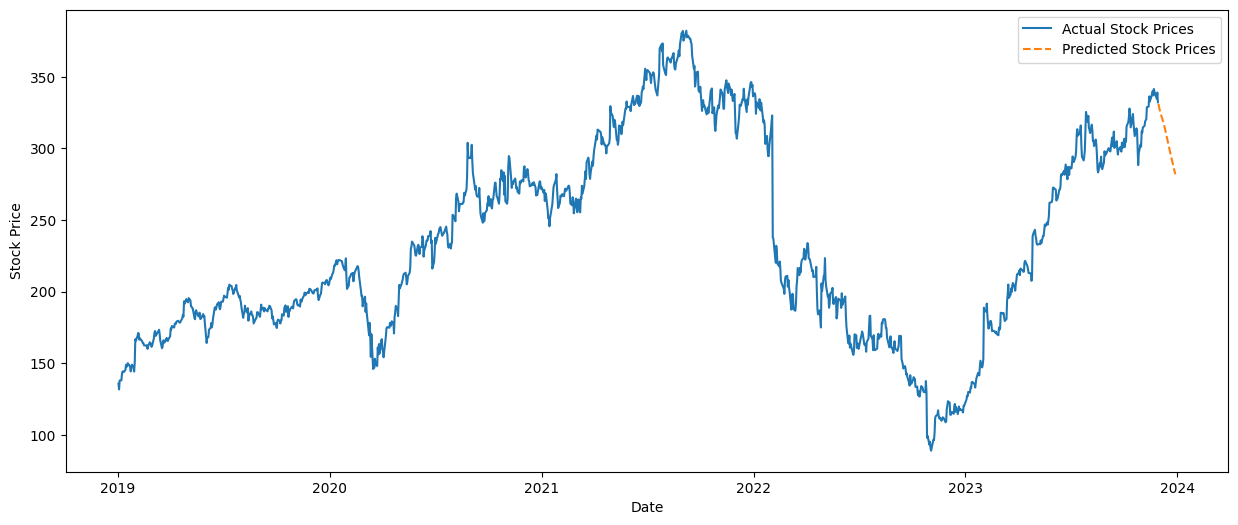

In [89]:
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['Close'], label='Actual Stock Prices')
plt.plot(pd.date_range(start=data.index[-1], periods=31)[1:], predicted_prices, label='Predicted Stock Prices', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()